In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis Preliminar de Datos

Antes de levantar los archivos, cambiamos su atributo `encoding` a `utf-8`. <br>
Luego elegimos el encoding (puede ser ANSI o Latin-1, por el momento, debido a las tildes).

In [4]:
#Levantamos los datasets en crudo (archivos .csv)
df_clientes     =pd.read_csv('./Modules/Datasets/Clientes.csv'    , encoding='latin-1', sep=';')
df_compras      =pd.read_csv('./Modules/Datasets/Compra.csv'      , encoding='latin-1', sep=',')
df_gastos       =pd.read_csv('./Modules/Datasets/Gasto.csv'       , encoding='latin-1', sep=',')
df_localidades  =pd.read_csv('./Modules/Datasets/Localidades.csv' , encoding='latin-1', sep=',')
df_proveedores  =pd.read_csv('./Modules/Datasets/Proveedores.csv' , encoding='latin-1', sep=',')
df_sucursales   =pd.read_csv('./Modules/Datasets/Sucursales.csv'  , encoding='latin-1', sep=';')
df_ventas       =pd.read_csv('./Modules/Datasets/Venta.csv'       , encoding='latin-1', sep=',')
df_canalventa   =pd.read_excel('./Modules/Datasets/CanalDeVenta.xlsx')
df_tipogasto    =pd.read_csv('./Modules/Datasets/TiposDeGasto.csv', encoding='latin-1', sep=',')

Las columnas están nombradas sin seguir ninguna regla. Algunas en mayúsculas, otras en minúsculas, con `camelcase` u otro tipo de separación entre palabras, cómo la separación mediante `underscore`.
Además,ciertos nombres no son lo suficientemente descriptivos para brindarnos la información necesaria sobre lo que contiene la columna.<br>
Este mismo invonveniente tenemos en el contenido de ciertas columnas. Los datos no siguen un estándar de escritura.

Mencionamos algunas incongruencias en el dataset **Clientes.csv**
- Que es X o Y? No sabemos a que hace referencia.
- ID en mayúsculas y el resto de columnas capitalizadas.
- El domicilio se carga en mayúsculas?.

In [3]:
#Vemos las incongruencias en un solo registro...
df_clientes.head(1)

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58.0,LOMA VERDE,"-58,81850307","-34,30997088",NaN


No existe una `normalización` con respecto a los datos insertados. Es decir, nos encontramos con diversas maneras de referir al mismo dato. <br>
Tomamos el ejemplo concreto de la tabla **Sucursales.csv**. Al ingresar el nombre de una Provincia, se debe determinar la manera correcta de ingestarlo, y ese marco debe ser respetado en las futuras ingestas. <br>
¿De cuantas maneras distintas se puede escribir un mismo dato? No es algo que busquemos saber.
En su lugar, determinemos, por ejemplo: a partir de ahora Buenos Aires se debe incertar de la 
siguiente manera -> `'Ciudad de Buenos Aires'`. Siempre así, no se aceptan variaciones.
Para evitar tener que lidiar con 'Bs. As', 'Buenos Aires', 'C. de Buenos Aires', etc etc

In [4]:
#Observemos que en solo 5 registros observamos que no existe normalización en Localidad y Provincia.
df_sucursales.head()

,ï»¿ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,"-34,5678060","-58,4495720"
1,2,Palermo 1,Guatemala 5701,CABA,CABA,"-34,5790350","-58,4335660"
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,C deBuenos Aires,"-34,5959660","-58,4051500"
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,"-34,6046850","-58,3987640"
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,"-34,6173080","-58,4161790"


## Evaluación de Calidad de Datos

El dataset **Clientes.csv** posee una columna completa con valores nulos.Procedemos a eliminarla debido a que no aporta ningún tipo de valor y entorpece el análisis.

In [5]:
df_clientes.drop(columns='col10', inplace=True)

Obtenemos un análisis de los registros y datos de todos los datasets.

In [6]:
dataFrames = [df_clientes, df_compras, df_gastos, df_localidades, df_proveedores, df_sucursales, df_ventas]
names = ['df_clientes', 'df_compras', 'df_gastos', 'df_localidades', 'df_proveedores', 'df_sucursales', 'df_ventas']

In [7]:
total_datos = []
sin_null = []
con_null = []
total_registros = []
total_registros_null = []

for i, df in enumerate(dataFrames):
    #Datos null inclusive
    total_datos.append( df.shape[0] * df.shape[1] )
    #Datos sin null
    sin_null.append(df.count().sum())
    #Cantidad de Registros
    total_registros.append( len(df) )
    #Datos null
    null_columnas = df.isna().sum()
    con_null.append( null_columnas.sum() )
    #Obtenemos la cantidad de registros que poseen al menos un dato nulo
    is_null = df.isnull()
    row_has_null = is_null.any(axis=1)
    total_registros_null.append( len(df[row_has_null]) )

In [8]:
data = pd.DataFrame({
'Dataset': names,
'Datos Total': total_datos, 
'Datos sin null': sin_null, 
'Datos Nulos': con_null, 
'Cantidad Registros': total_registros, 
'Cant de Registros con Null': total_registros_null
})

In [9]:
data

,Dataset,Datos Total,Datos sin null,Datos Nulos,Cantidad Registros,Cant de Registros con Null
0,df_clientes,21456,21313,143,2384,112
1,df_compras,103851,103484,367,11539,367
2,df_gastos,43200,43200,0,8640,0
3,df_localidades,57988,56949,1039,4142,543
4,df_proveedores,98,96,2,14,2
5,df_sucursales,217,217,0,31,0
6,df_ventas,461800,459996,1804,46180,1788


Guardamos el resultado en un archivo para su futura consulta.

In [10]:
data.to_csv('analisis.csv', index=False)

# Reporte Gráfico de Datos

In [10]:
datasets = [df_clientes, df_compras, df_gastos, df_localidades, df_proveedores, df_sucursales, df_ventas]
names = ['df_clientes', 'df_compras', 'df_gastos', 'df_localidades', 'df_proveedores', 'df_sucursales', 'df_ventas']

Creamos una columna auxiliar a fin de detectar nulos dentro de los registros.

In [11]:
diccionario = {False: 0, True: 1}

for df in datasets:
    tiene_null = df.isna().any(axis=1)
    df['es_null'] = tiene_null
    df['es_null'] = df.es_null.map(diccionario)

Podemos notar que la cantidad de registros con datos faltantes es relativamente baja con respecto a la cantidad de datos total dentro de los datasets.

In [ ]:
for i, df in enumerate(datasets):
    tiene_null = df.isna().sum().sum()
    if tiene_null > 0:
        print(names[i])
        sns.countplot(x="es_null", data=df)
        plt.title('Datos Completos vs Datos Nulos')
        plt.xlabel('Contiene algún campo vacío')
        plt.ylabel('Cantidad Registros')
        plt.legend()
        plt.show()

## Detección de Outliers
Usaremos la **Regla de las Tres Sigmas** <br>
- mínimo = Promedio – 3 * Desviación Estándar
- máximo = Promedio + 3 * Desviación Estándar

#### Compras <br>
Una compra no debería tener cantidades ni precios negativos. Por otro lado, evaluaremos cúanto es un precio "normal" de compra para determinar el máximo.

In [13]:
promedio = df_compras['Precio'].mean()
std_dev = df_compras['Precio'].std()
minimo = 0
maximo = promedio + 3 * std_dev

Observamos que los outliers en el dataset de Compras se generan en el `precio`.

In [ ]:
df_compras[(df_compras['Precio']<minimo) | (df_compras['Precio']>maximo)]

In [15]:
mascara_outlier = ((df_compras['Precio']<minimo) | (df_compras['Cantidad']<0) | (df_compras['Precio']>maximo))
df_compras['Outlier'] = mascara_outlier

#### Gastos

In [16]:
promedio = df_gastos['Monto'].mean()
std_dev = df_gastos['Monto'].std()
minimo = 0
maximo = promedio + 3 * std_dev

No posee Outliers a simple vista.

In [17]:
df_gastos[(df_gastos['Monto']<minimo) | (df_gastos['Monto']>maximo)]

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto,es_null


In [18]:
mascara_outlier = (df_gastos['Monto']<minimo) | (df_gastos['Monto']>maximo)
df_gastos['Outlier'] = mascara_outlier

#### Ventas

In [19]:
#Precio
promedio = df_ventas['Precio'].mean()
std_dev = df_ventas['Precio'].std()
minimo = 0
maximo = promedio + 3 * std_dev

In [20]:
mascara_outlier = ((df_ventas['Precio']<minimo) | (df_ventas['Precio']>maximo))
df_ventas['Outlier'] = mascara_outlier

## Representación de Outliers

df_compras


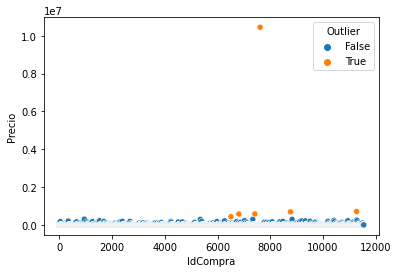

df_ventas


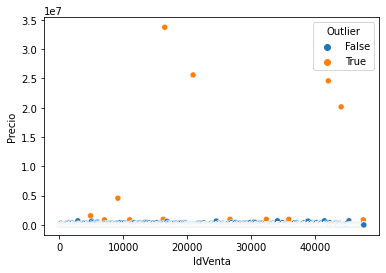

In [21]:
for i, df in enumerate(datasets):
    columns = list(df.columns)
    if 'Outlier' in columns:
        if df.Outlier.any():
            print(names[i])
            sns.scatterplot(x=df[columns[0]], y='Precio',hue='Outlier', data=df)
            plt.show()